# Worksheet 10

Name: Shu Xing
UID: U97658230

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1.Yes, this is an example of classification as the task involves predicting a categorical outcome based on a given input (their GPA).   
2.No, this is not an example of classification, as the task involves predicting a continuous outcome based on a given input (their GPA).   
3.Yes, this is an example of classification as the task involves predicting a categorical outcome based on a given input.   
4.No, this is not an example of classification, as the task involves predicting a numerical outcome based on a given input (specified minute).   

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

splitting the dataset into a training set and testing set is commonly known as "train-test split". The typical ratio of the split is 70-30 or 80-20.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when a model is too simple to capture the underlying patterns in the data.  Signs of underfitting include high training and testing errors, low accuracy, and poor generalization to new data.    
Overfitting occurs when a model is too complex and captures noise in the data, rather than the underlying patterns.   Signs of overfitting include low training error but high testing error, high variance, and poor generalization to new data.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

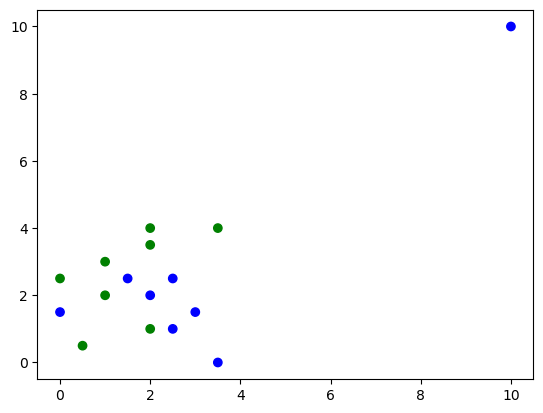

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes. Apparently there is a outlier point. It's (10,10). After remove,   
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

One way to identify potential noise points is to look for observations that are significantly different from the majority of the data points, or that do not fit with the expected distribution or relationships between the variables in the dataset. In the given dataset, there are no obvious signs of noise points. 

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

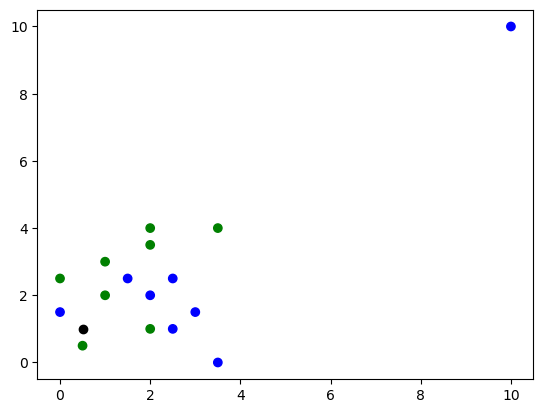

In [6]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())

plt.scatter(0.5, 1, color="k")
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

In [12]:
import numpy as np

def n_closest_to(example, n, data):
    distances = np.linalg.norm(np.array(data[["Attribute A", "Attribute B"]]) - example, axis=1)
    indices = np.argsort(distances)[:n]
    return data.iloc[indices]


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [ ]:
def majority(points):
    location = (example[0], example[1])
    radius = np.max(distances[indices])
    _, axes = plt.subplots()
    axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
    cir = plt.Circle(location, radius, fill=False, alpha=0.8)
    axes.add_patch(cir)
    axes.set_aspect('equal')
    plt.show()

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [15]:
def knn(training_set, training_labels, test_point, k):
    distances = np.sqrt(np.sum((training_set - test_point)**2, axis=1))
    nearest_neighbors = np.argsort(distances)[:k]
    neighbor_labels = training_labels[nearest_neighbors]
    counts = np.bincount(neighbor_labels)
    return np.argmax(counts)

count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    training_set = np.delete(np.array(list(zip(data["Attribute A"], data["Attribute B"]))), i, axis=0)
    training_labels = np.delete(data["Class"], i)
    test_point = np.array([data["Attribute A"][i], data["Attribute B"][i]])
    prediction = knn(training_set, training_labels, test_point, 3)
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count / len(data["Class"]))

overall accuracy =  0.6875
